Установим базовые библиотеки (pandas и numpy) и подготовим данные

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from google.colab import files
import warnings

warnings.filterwarnings('ignore')


uploaded = files.upload()

Saving glass.data to glass.data


In [10]:
col_names = ["Refractive_index", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"]
data = pd.read_csv("glass.data", delimiter=',', index_col=0, names=col_names)
data.head()

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Создадим модель на основе метода K ближайших соседей и обучим ее. Затем, вычислим ошибку модели для разных значений K с помощью метода кросс-валидации. Для этого используем класс cross_val_score

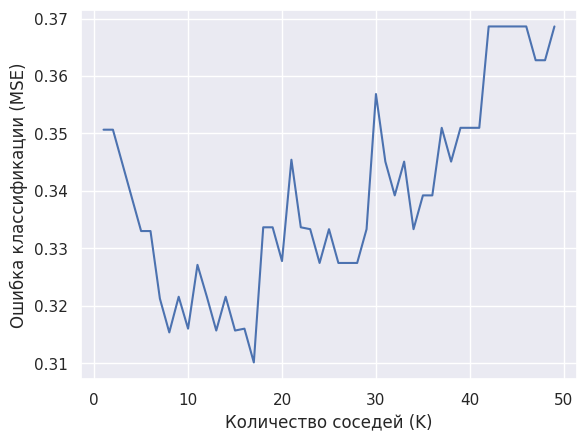

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cv_scores = []  # Значения метрики модели для различных значений K
K_list = list(range(1, 50))

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:9], data['class'], test_size=0.2)

# Вычисление метрики модели для различых значений K
for i in range(1, len(K_list) + 1):
  knn = KNeighborsClassifier(n_neighbors=i, weights='distance', algorithm='ball_tree', p=2)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

# Значения ошибки классификации
MSE = [1-x for x in cv_scores]

plt.plot(K_list, MSE)
plt.xlabel("Количество соседей (K)")
plt.ylabel("Ошибка классификации (MSE)")
plt.show()

В результате экспериментов с разными значениями размера обучающей выборки (test_size), количества подмножеств при обучении (cv) и количества соседей (K), получаем лучшие параметры для обучения. test_size = 0.2, cv=10, k=1.

In [20]:
# Глобальный минимум значения ошибки классификации
k_min = min(MSE)

# Локальные минимумы значения ошибки классификации
all_k_min = []
for i in range(len(MSE)):
  if MSE[i] <= k_min:
    all_k_min.append(K_list[i])

min_neighbors = min(all_k_min)
print("Оптимальные значения: ", all_k_min)

Оптимальные значения:  [17]


In [21]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и тестовую выборку
X_train, X_holdout, Y_train, Y_holdout = train_test_split(data.iloc[:, 0:9], data['class'], test_size=0.2, random_state=20)

# Создание модели с оптимальным значения K
knn = KNeighborsClassifier(n_neighbors=min_neighbors, weights='distance', algorithm='ball_tree', p=2)
knn.fit(X_train, Y_train)

# Проверка точности работы модели
knn_pred = knn.predict(X_holdout)
acc = accuracy_score(Y_holdout, knn_pred)
print("Accuracy: ", acc)

Accuracy:  0.5581395348837209


In [22]:
# Проверка работы модели на новых данных
X_sample = [[1.523, 13.021, 3.145, 1.521, 71.3, 0.765, 9.42, 0.64, 0.17]]
target = knn.predict(X_sample)
print(target)

[1]


# Ответы на контрольные вопросы

**1. Поясните особенности основных методов метрической классификации: метод ближайшего соседа и метод k-ближайших соседей.**

Методы метрической классификации основаны на измерении растояний между объектами (разницы в значениях их признаков) для приняти решения о принадлежности к тому или иному классу.

Метод k-ближайших соседей
Классификация нвого объекта производится на основании классов ближайших к нему объектов. Является одним из наиболее простых методов классификации, однако для своей работы требует хранения всех обучающих данных, так как новый объект классифицируется путем поиска ближайших соседей среди всех ближайших.


**2. Поясните основные этапы и принципы реализации метода kNN.**


Основные этапы реализации метода kNN


1.   Сбор данных. Для начала реализации метода необходимо иметь обучающую выборку с метками для каждого класса.
2.   Нормализация / стандартизация данных. Для получения приемлимого уровня точности модели метода kNN важно, чтобы все признаки имели схожие масштабы. Это нужно для исключения доминирования признаков с большими значениями.
3. Определение расстояния. Для определения расстояния между объектами нужно выбрать подходящую метрику. К ним относятся:

*   Евклидово расстояние (для непрерывных данных)
*   Манхэтеннское расстояние (для дискретных данных)
*   Косинусное расстояние (для текстовых данных и данных в виде векторов)

4. Выбор параметра k. Выбор количества k критически важен для эффективности обучения модели. При выборе слишком малых значения, алгоритм становится чувствителен к шумам, а при выборе слишком больших - происходит переадаптация к данным.
5. Оценка точности работы модели. Для оценки точности работы модели используются методы кросс-валидации, подсчет метрик точности, полноты, F1 меры и других характеристик в зависимости от задачи.


Принципы метода kNN

1.   Локальность. Метод kNN основывается на локально информации. Решение о классе объекта определяется на основе данных, находящихся в непосредственной близости от рассматриваемого обеъекта.
2.   Гибкость. Алгоритм kNN относится к непараметрическим методам. Это означает, что он не требует явного построения модели, определяя класс объекта используя обучающую выборку. Из - за этого, метод kNN хорошо подходит для данных с нелинейной структурой.
3. Простота. Алгоритм kNN прост в реализации и не требует значительных вычислительных ресурсов.


**3. Поясните принцип выбора количества соседей, по которому определяется принадлежность объекта к какому-либо классу**

Выбор оптимального параметра k количества соседей является ключевым для модели kNN. При слишком малом значении параметра, модель становится более уязвимой к шумам, тогда как при выборе слишком больших значений, происходит переадаптация модели к данным.

**4. В чем заключается метод парзеновского окна?**

Метод парзеновского окна - это метод классификации, принцип действия которого похож на метод kNN. Он также использует ближайших соседей для определения класса объекта, однако, он также использует взвешивание ближайших соседей на основании их расстояния от объекта.
Для реализации метода, точка, подлежащая классификации окружается "окном" (кругом на плоскости). Размер это окна является гиперпараметром, который выбирается заранее.
Далее, точки внутри этого окна взвешиваются по мере того, на каком расстоянии они находятся от точки. Чем ближе точка к центру окна, тем больший вес ей дается.
В конце суммируются веса всех точек, попавших в окно и выбирается класс, который получил наибольшую сумму весов.


**5. Поясните принцип метода потенциальных функций**

Метод потенциальных функций - это алгоритм классификации, относящихся к непараметрических методов, таких как метод k-ближайших соседей и метод парзеновского окна. Его особенностью является присвоение каждому объекту из обучающей выборки потенциала, который указывает, насколько сильно данный объект влияет на окружающие точки. Потенциал объекта уменьшается по мере увеличения расстояния до классифицируемой точки. При этом каждый объект добавляет к потенциалу свой вклад, который зависит от расстояния до классифицируемой точки. В машинном обучении потенциальные функции применяются для поиска минимума функции потерь и в задачах обучения с подкреплением.

**6. Назовите, какие параметры опитимизуруют в методах kNN.**



1.   K (Количество ближайших соседей). Определяет количество ближайших соседей, которые учитываются при определении класса объекта. Для подбора этого параметра чаще всего используется кросс - валидация.
2.   Метрика расстояния. Для рассчета расстояния могут использоваться различные методы, которые и являются еще одним параметром модели KNN. К метрикам расстояния относятся евклидово расстояние, манхэтеннское расстояние и косинусное расстояние.
3. Вес соседей. Некоторые реализации kNN позволяют назначать соседям различный вес, учитывая их расстояние от классифицируемого объекта.
4. Алгоритм поиска ближайших соседей. Для поиска ближайших соседей разработано несколько различных алгоритмов, таких как Brute force, KD-tree и Balltree. Выбор алгоритма поиска может повлиять на результаты работы модели.
5. Размер обучающей выборки. kNN определяет класс объекта на основании обучающей выборки, поэтому при большом ее объеме работа модели может стать вычислительно очень затратной.


В методах kNN оптимизируют в первую очередь k - параметр, отвечающий за количество ближайших соседей, которое учитывается при определении класса объекта. Для подбора этого параметра чаще всего используется кросс - валидация.







